In [1]:
%%sh
pip install -q --upgrade pip
pip install -q --upgrade diffusers transformers scipy ftfy huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.0/604.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 103.7 MB/s eta 0:00:00


In [2]:
from huggingface_hub import notebook_login

# Required to get access to stable diffusion model
notebook_login()

In [3]:
import torch
from diffusers import StableDiffusionPipeline

pipeline = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, revision="fp16"
)

pipeline = pipeline.to("cuda") 

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


In [4]:
import os

from IPython.display import Image, display


def generate_images(
    prompt,
    num_images_to_generate,
    num_images_per_prompt=4,
    guidance_scale=1,
    output_dir="images",
    display_images=False,
):

    num_iterations = num_images_to_generate // num_images_per_prompt
    os.makedirs(output_dir, exist_ok=True)

    for i in range(num_iterations):
        images = pipeline(
            prompt, num_images_per_prompt=num_images_per_prompt, guidance_scale=guidance_scale
        )
        for idx, image in enumerate(images.images):
            image_name = f"{output_dir}/image_{(i*num_images_per_prompt)+idx}.png"
            image.save(image_name)
            if display_images:
                display(Image(filename=image_name, width=128, height=128))

  0%|          | 0/50 [00:00<?, ?it/s]

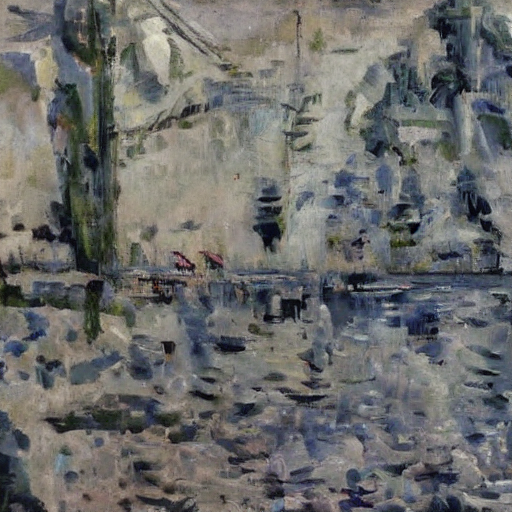

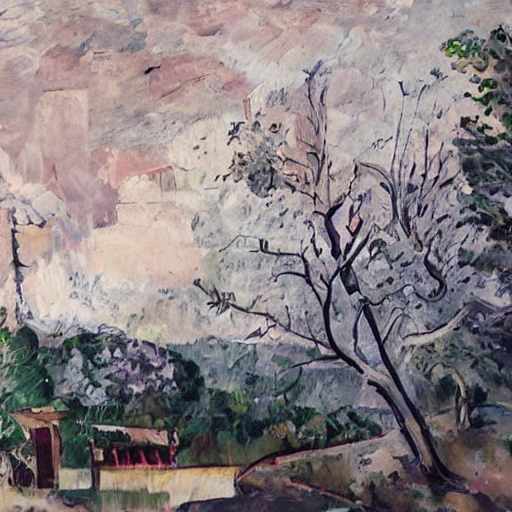

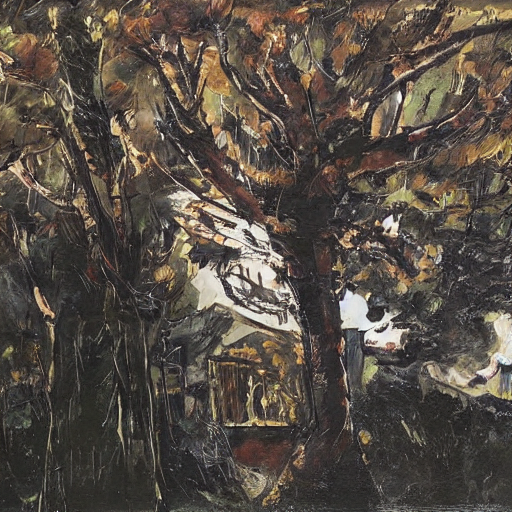

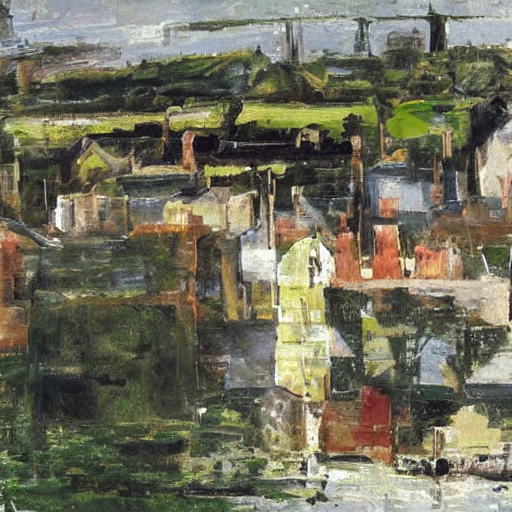

In [5]:
# 1000 images take just under an 1 hour on a V100

generate_images("<Cézanne> landscape painting", 5, guidance_scale=1, display_images=True)

In [6]:
!zip -r /content/images.zip /content/images


  adding: content/images/ (stored 0%)
  adding: content/images/image_0.png (deflated 0%)
  adding: content/images/image_2.png (deflated 0%)
  adding: content/images/image_3.png (deflated 0%)
  adding: content/images/image_1.png (deflated 0%)


In [ ]:
%rm -rf images
